In [37]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
data= pd.read_csv('price_index.csv')

In [39]:
data=data.drop(['Unnamed: 0'],axis=1)
data=data.drop(['Commodity'],axis=1)

In [40]:
cols= data.columns

In [42]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(data[cols].iloc[:,range(0,12)].values)
cov_mat =np.cov(X_std.T)

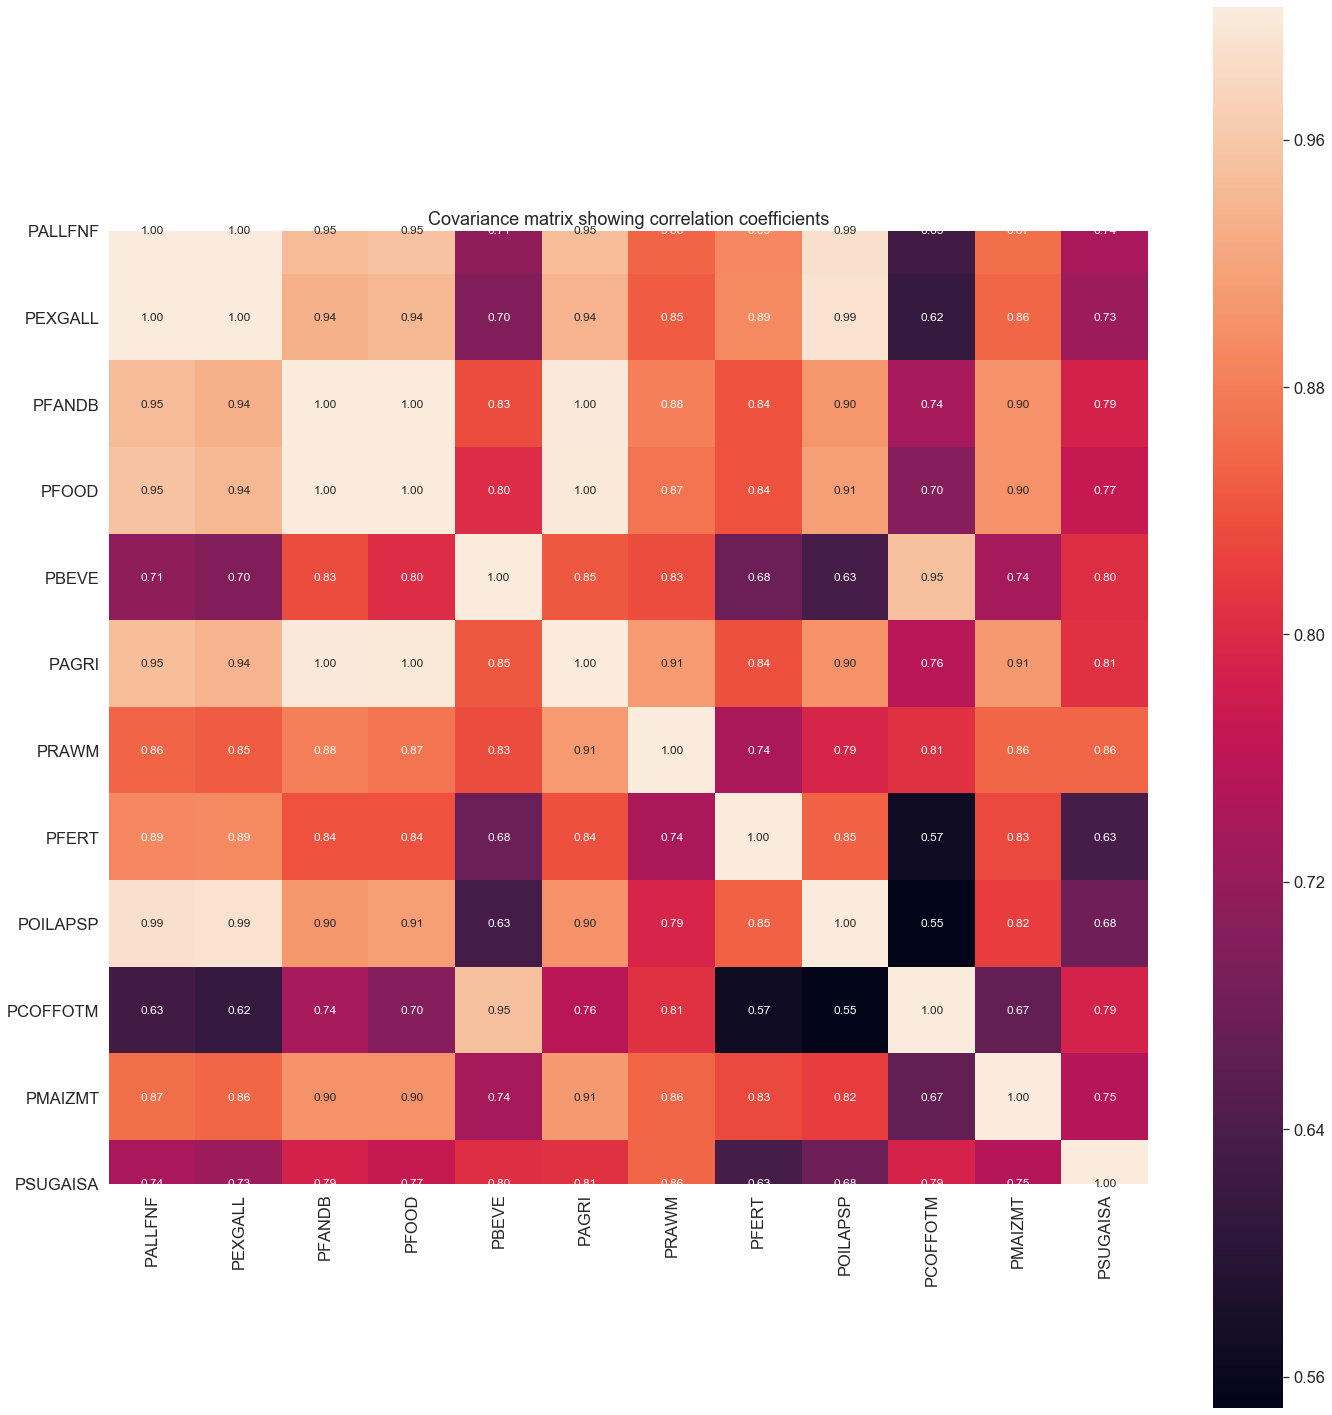

In [46]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()


In [50]:
data.corr()>0.8

,PALLFNF,PEXGALL,PFANDB,PFOOD,PBEVE,PAGRI,PRAWM,PFERT,POILAPSP,PCOFFOTM,PMAIZMT,PSUGAISA
PALLFNF,True,True,True,True,False,True,True,True,True,False,True,False
PEXGALL,True,True,True,True,False,True,True,True,True,False,True,False
PFANDB,True,True,True,True,True,True,True,True,True,False,True,False
PFOOD,True,True,True,True,False,True,True,True,True,False,True,False
PBEVE,False,False,True,False,True,True,True,False,False,True,False,True
PAGRI,True,True,True,True,True,True,True,True,True,False,True,True
PRAWM,True,True,True,True,True,True,True,False,False,True,True,True
PFERT,True,True,True,True,False,True,False,True,True,False,True,False
POILAPSP,True,True,True,True,False,True,False,True,True,False,True,False
PCOFFOTM,False,False,False,False,True,False,True,False,False,True,False,False


Crude Oil- Food Prices
1,3,4,6,last two seem like good price metrics, especially given all pricing data we have. 

Use mobility and covid cases, provide map for that maybe, considering its the max use you can find for it 
Use UK data a lot from google mobility

Use GDP ppp and correlate as well 

## Random Classifier for feature selection

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [83]:
model = RandomForestRegressor(random_state=1, max_depth=12)

train, test= train_test_split(data)

cols=train.columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_x = pd.get_dummies(data[cols])

train_x

,PALLFNF,PEXGALL,PFANDB,PFOOD,PBEVE,PAGRI,PRAWM,PFERT,POILAPSP,PCOFFOTM,PMAIZMT,PSUGAISA
0,50.254019,52.724814,64.462578,65.815900,48.467677,64.815354,67.201791,53.415036,40.225371,72.990448,109.586357,8.424091
1,50.247364,52.725752,64.672877,66.411709,44.121634,65.127504,68.202929,53.133171,41.089686,67.882111,113.921257,7.843000
2,50.273464,52.841774,65.511172,67.330671,44.006519,65.905506,68.573076,52.632231,41.165326,70.143341,116.684593,8.250454
3,50.689243,53.354359,62.783126,64.459292,42.972540,64.035681,72.508877,54.112916,44.087573,65.429993,109.055138,9.455715
4,52.134939,54.978040,64.732021,66.748541,40.898790,65.703299,72.273732,56.535760,45.566176,60.257000,109.177910,9.613335
...,...,...,...,...,...,...,...,...,...,...,...,...
335,119.912673,120.101842,102.776692,103.731360,91.493483,102.305830,99.120569,97.433015,149.215082,164.440000,167.059017,13.335238
336,119.554726,118.936458,104.103953,105.361448,89.241629,103.857359,102.189213,96.742492,145.135856,150.356667,171.814135,14.166667
337,111.092292,109.186522,100.386331,101.402123,88.380684,100.412256,100.587638,102.515800,126.528695,145.861053,168.744598,15.071053
338,93.873898,90.067104,96.912251,97.709010,87.495359,96.782647,95.905913,108.366542,76.219680,161.462727,162.179148,11.805000


In [84]:
model.fit(data,train_x)

/Users/neelbhandari/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [85]:
importances = model.feature_importances_

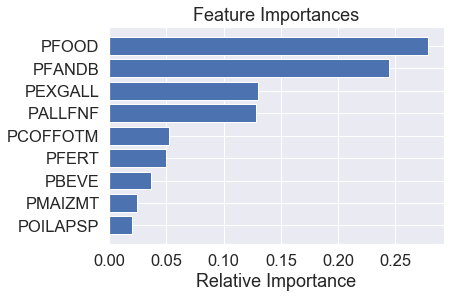

In [86]:
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [87]:
final_param=['PFOOD','PFANDB','PEXGALL','PALLFNF']